# Generate and Visualize Data

In [2]:
import pandas as pd
import numpy as np

N_SHOWS = 250
CAPACITY = 800
MAX_MARKETING = 3000

np.random.seed(42)

In [3]:
days_before_show = np.random.randint(
    low=0,
    high=31,
    size=N_SHOWS
)

In [4]:
marketing_spend = np.random.exponential(
    scale=800,
    size=N_SHOWS
)
marketing_spend = np.clip(marketing_spend, 0, MAX_MARKETING)

In [5]:
noise = np.random.normal(
    loc=0,
    scale=40,
    size=N_SHOWS
)

In [6]:
base_demand = 500 - (days_before_show * 8)
marketing_effect = marketing_spend * 0.08

raw_demand = base_demand + marketing_effect + noise

In [7]:
tickets_sold = np.clip(raw_demand, 0, CAPACITY)

In [8]:
sold_out = (tickets_sold == CAPACITY).astype(int)

In [9]:
df = pd.DataFrame({
    "days_before_show": days_before_show,
    "marketing_spend": marketing_spend,
    "tickets_sold": tickets_sold,
    "sold_out": sold_out
})


In [10]:
print(df.head())

   days_before_show  marketing_spend  tickets_sold  sold_out
0                 6       143.929190    462.377477         0
1                19       611.009240    328.223761         0
2                28       530.606624    276.730074         0
3                14       943.257752    516.519487         0
4                10       251.124837    458.035934         0


In [11]:
print(df.describe())

       days_before_show  marketing_spend  tickets_sold  sold_out
count        250.000000       250.000000    250.000000     250.0
mean          15.492000       796.231442    438.887764       0.0
std            9.374511       775.912578    107.368369       0.0
min            0.000000         4.158681    199.123011       0.0
25%            7.000000       235.147930    363.434876       0.0
50%           15.000000       532.703111    438.683190       0.0
75%           24.000000      1016.566201    503.464504       0.0
max           30.000000      3000.000000    746.579129       0.0


In [12]:
print(df["sold_out"].value_counts())

sold_out
0    250
Name: count, dtype: int64


In [13]:
print(df)

     days_before_show  marketing_spend  tickets_sold  sold_out
0                   6       143.929190    462.377477         0
1                  19       611.009240    328.223761         0
2                  28       530.606624    276.730074         0
3                  14       943.257752    516.519487         0
4                  10       251.124837    458.035934         0
..                ...              ...           ...       ...
245                19       328.246511    370.829194         0
246                12       853.046123    435.855972         0
247                 8       389.422505    492.698746         0
248                 2       915.591805    565.881770         0
249                 6       333.169767    547.013408         0

[250 rows x 4 columns]


Text(0, 0.5, 'Tickets sold')

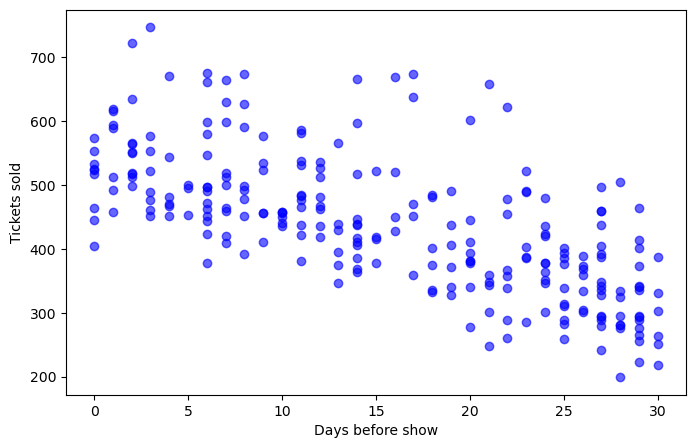

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

plt.scatter(df["days_before_show"], df["tickets_sold"], color='blue', alpha=0.6, label='Actual tickets')
plt.xlabel("Days before show")
plt.ylabel("Tickets sold")

Text(0, 0.5, 'Tickets sold')

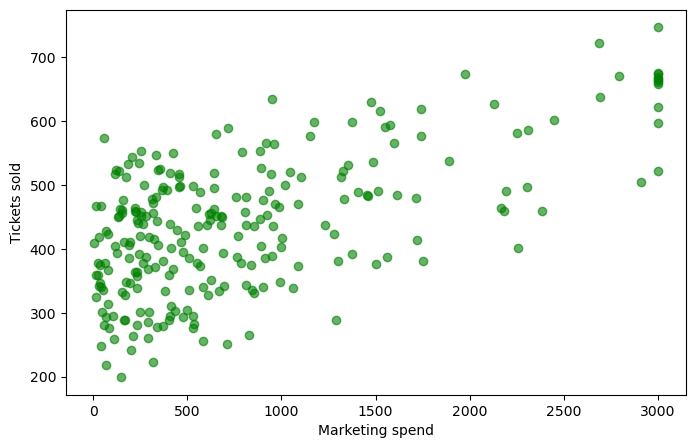

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

plt.scatter(df["marketing_spend"], df["tickets_sold"], color='green', alpha=0.6, label='Actual tickets')
plt.xlabel("Marketing spend")
plt.ylabel("Tickets sold")

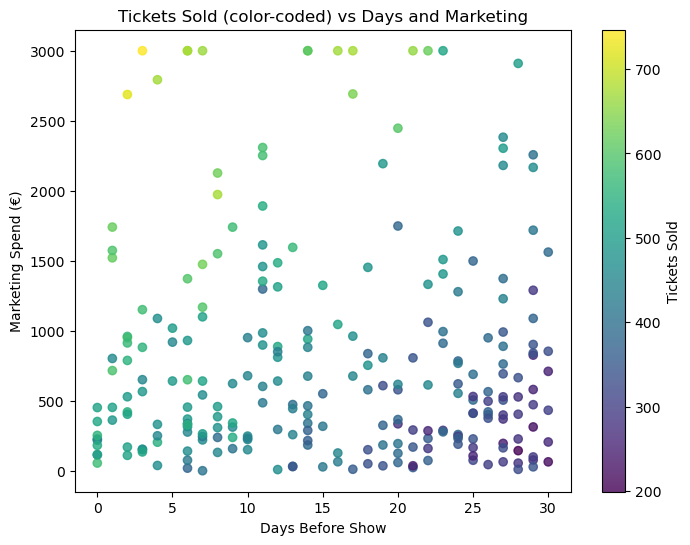

In [16]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    df["days_before_show"],
    df["marketing_spend"],
    c=df["tickets_sold"],  # color by Z
    cmap='viridis',
    alpha=0.8
)
plt.xlabel('Days Before Show')
plt.ylabel('Marketing Spend (€)')
plt.title('Tickets Sold (color-coded) vs Days and Marketing')
plt.colorbar(scatter, label='Tickets Sold')
plt.show()

# Multiple Linear Regression Calculation & Visualization

In [17]:
from sklearn.linear_model import LinearRegression

X = df[["days_before_show", "marketing_spend"]]
Y = df["tickets_sold"]

model = LinearRegression()
model.fit(X, Y)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 492.02935168298427
Coefficients: [-7.81742914  0.08535963]


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


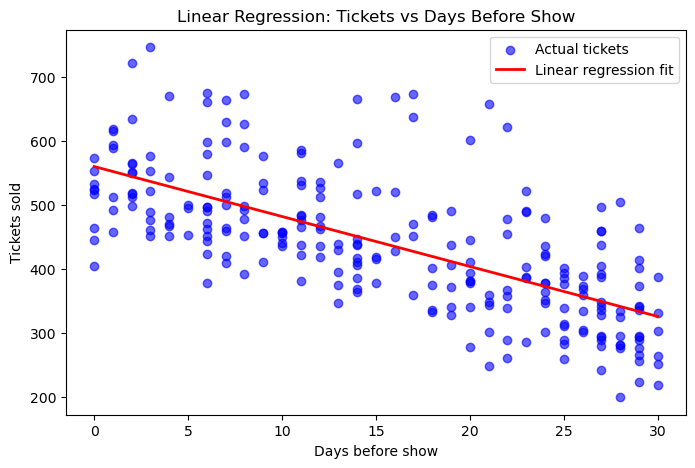

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

plt.scatter(df["days_before_show"], df["tickets_sold"], color='blue', alpha=0.6, label='Actual tickets')
plt.xlabel("Days before show")
plt.ylabel("Tickets sold")

X_plot = np.linspace(df["days_before_show"].min(), df["days_before_show"].max(), 100).reshape(-1,1)

avg_marketing = df["marketing_spend"].mean()
X_plot_full = np.column_stack((X_plot, np.full_like(X_plot, avg_marketing)))

Y_plot = model.predict(X_plot_full)
plt.plot(X_plot, Y_plot, color='red', linewidth=2, label='Linear regression fit')

plt.xlabel('Days before show')
plt.ylabel('Tickets sold')
plt.title('Linear Regression: Tickets vs Days Before Show')
plt.legend()
plt.show()

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


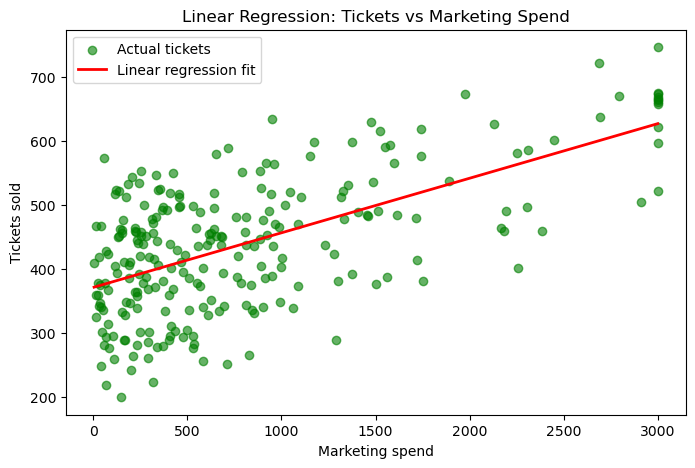

In [22]:
plt.figure(figsize=(8,5))

plt.scatter(df["marketing_spend"], df["tickets_sold"], color="green", alpha=0.6, label="Actual tickets")

X_plot = np.linspace(df["marketing_spend"].min(), df["marketing_spend"].max(), 100).reshape(-1,1)
avg_days_before_show = df["days_before_show"].mean()

X_plot_full = np.column_stack((np.full_like(X_plot, avg_days_before_show), X_plot))

Y_plot = model.predict(X_plot_full)
plt.plot(X_plot, Y_plot, color='red', linewidth=2, label='Linear regression fit')

plt.xlabel('Marketing spend')
plt.ylabel('Tickets sold')
plt.title('Linear Regression: Tickets vs Marketing Spend')
plt.legend()
plt.show()

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


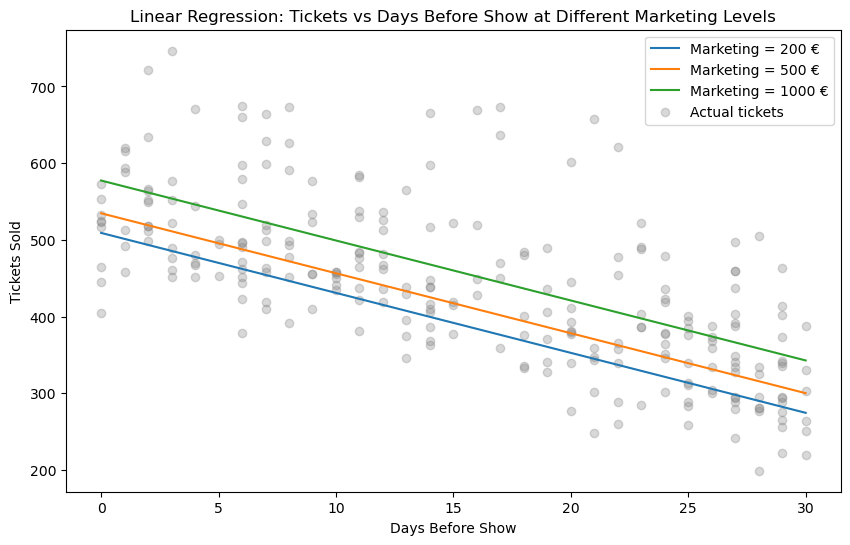

In [27]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

marketing_levels = [200, 500, 1000]

for marketing_value in marketing_levels:
    X_plot = np.linspace(df["days_before_show"].min(), df["days_before_show"].max(), 100).reshape(-1,1)
    
    X_plot_full = np.column_stack((X_plot, np.full_like(X_plot, marketing_value)))
    
    Y_plot = model.predict(X_plot_full)
    
    plt.plot(X_plot, Y_plot, label=f'Marketing = {marketing_value} €')

plt.scatter(df["days_before_show"], df["tickets_sold"], alpha=0.3, color='gray', label='Actual tickets')

plt.xlabel('Days Before Show')
plt.ylabel('Tickets Sold')
plt.title('Linear Regression: Tickets vs Days Before Show at Different Marketing Levels')
plt.legend()
plt.show()